Historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
store_df = pd.read_csv('store.csv')

In [ ]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


# EDA

In [ ]:
print(train_df.shape)
print(test_df.shape)
print(store_df.shape)

(1017209, 9)
(41088, 8)
(1115, 10)


In [ ]:
#merging Data
merged_df = train_df.merge(store_df, on='Store', how='left')
merged_df.sample(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
442127,258,6,2014-05-31,4623,427,1,0,0,0,a,a,27190.0,7.0,2010.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
514204,975,5,2014-03-28,7281,737,1,0,0,0,a,c,9630.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
8765,961,5,2015-07-24,5619,661,1,0,0,1,d,c,9430.0,NaN,NaN,0,NaN,NaN,NaN
401986,134,1,2014-07-07,5407,560,1,0,0,0,a,a,1200.0,9.0,2008.0,0,NaN,NaN,NaN
728486,62,1,2013-09-16,6395,745,1,0,0,0,a,a,2050.0,NaN,NaN,0,NaN,NaN,NaN
967261,227,4,2013-02-14,5090,529,1,0,0,0,a,a,2370.0,NaN,NaN,0,NaN,NaN,NaN
861786,677,1,2013-05-20,0,0,0,0,a,0,d,a,1740.0,6.0,2014.0,1,45.0,2009.0,"Feb,May,Aug,Nov"
643384,815,1,2013-12-02,14650,1296,1,1,0,0,a,a,590.0,1.0,1900.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
802355,341,5,2013-07-12,4855,696,1,0,0,0,a,a,190.0,9.0,2011.0,0,NaN,NaN,NaN
892841,512,1,2013-04-22,4825,1248,1,1,0,0,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"


In [ ]:
#merging test Data
merged_test = test_df.merge(store_df, on='Store', how='left')

In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
merged_df.shape

(1017209, 18)

In [ ]:
merged_df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695
CompetitionOpenSinceMonth,-0.050746,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326
CompetitionOpenSinceYear,-0.004592,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155


<Axes: xlabel='CompetitionOpenSinceMonth', ylabel='Sales'>

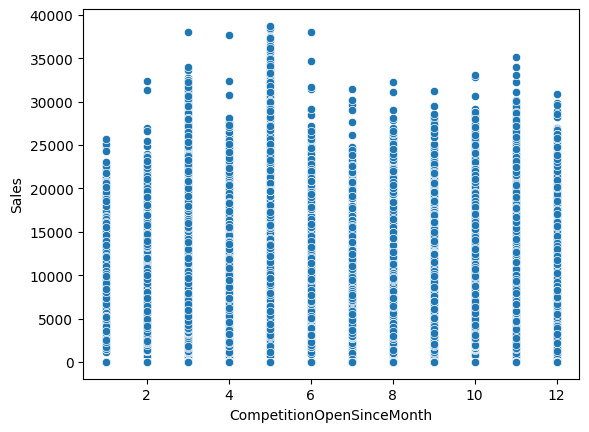

In [ ]:
sns.scatterplot(x='CompetitionOpenSinceMonth', y='Sales', data=merged_df)

<Axes: xlabel='CompetitionOpenSinceYear', ylabel='Sales'>

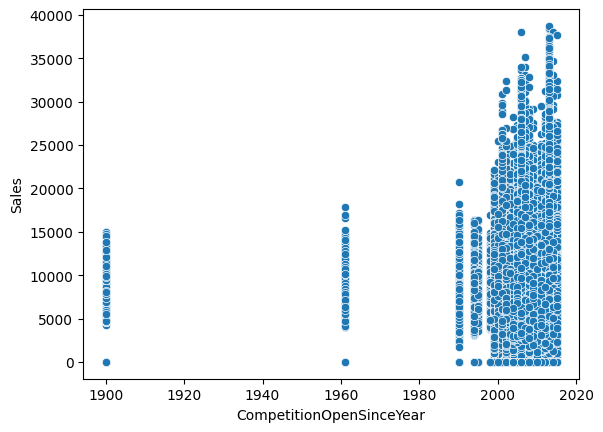

In [ ]:
sns.scatterplot(x='CompetitionOpenSinceYear', y='Sales', data=merged_df)

<Axes: xlabel='Promo2SinceWeek', ylabel='Sales'>

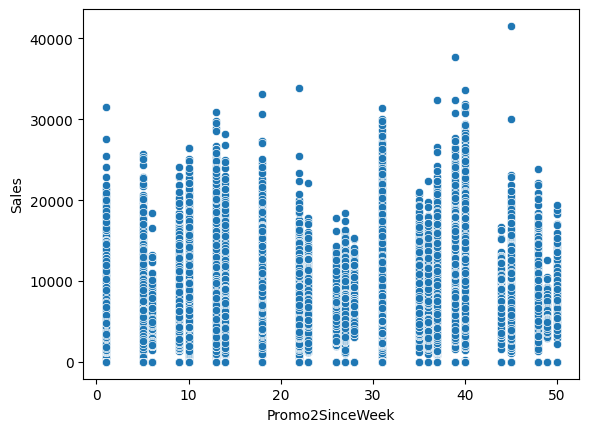

In [ ]:
sns.scatterplot(x='Promo2SinceWeek', y='Sales', data=merged_df)

<Axes: xlabel='Promo2SinceYear', ylabel='Sales'>

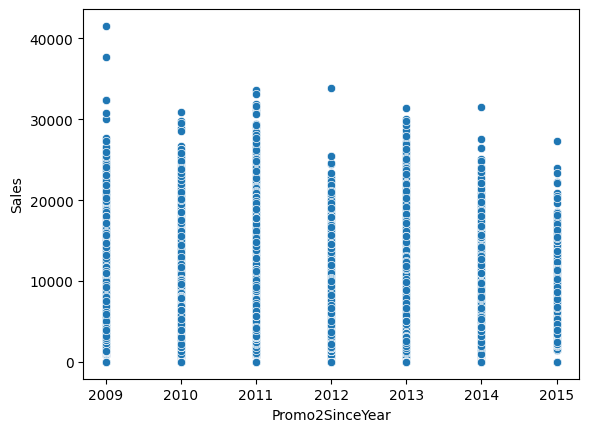

In [ ]:
sns.scatterplot(x='Promo2SinceYear', y='Sales', data=merged_df)

# Feature Engineering

In [ ]:
#splitting date
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df.Date.dt.month
    df['Year'] = df.Date.dt.year
    df['Day'] = df.Date.dt.day
    df['Week'] = df.Date.dt.isocalendar().week

In [ ]:
split_date(merged_df)

In [ ]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day,Week
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,7,2015,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,2015,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,7,2015,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,7,2015,31,31


In [ ]:
split_date(merged_test)
merged_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day,Week
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,9.0,2008.0,0,NaN,NaN,NaN,9,2015,17,38
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",9,2015,17,38
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,4.0,2013.0,0,NaN,NaN,NaN,9,2015,17,38
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,10.0,2014.0,0,NaN,NaN,NaN,9,2015,17,38
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,8.0,2000.0,0,NaN,NaN,NaN,9,2015,17,38


In [ ]:
#combining these columns in one to get more clear insight (competitionopensincemonth & competitionopensinceyear)
def competition(df):
    """ we will get competiton open in moths """
    df['CompetitionOpen'] = (12 * (df['Year'] - df['CompetitionOpenSinceYear'])) + (df.Month - df['CompetitionOpenSinceMonth'])
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x:x if x > 0 else 0).fillna(0) #to convert all negative value in 0.

In [ ]:

competition(merged_df)
competition(merged_test)

In [ ]:
round(merged_df.describe(),2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Year,Day,Week,CompetitionOpen
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1014567.00,693861.00,693861.00,1017209.0,509178.00,509178.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18,5430.09,7.22,2008.69,0.5,23.27,2011.75,5.85,2013.83,15.70,23.62,42.04
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38,7715.32,3.21,5.99,0.5,14.10,1.66,3.33,0.78,8.79,14.43,65.34
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,20.00,1.00,1900.00,0.0,1.00,2009.00,1.00,2013.00,1.00,1.0,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,710.00,4.00,2006.00,0.0,13.00,2011.00,3.00,2013.00,8.00,11.0,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,2330.00,8.00,2010.00,1.0,22.00,2012.00,6.00,2014.00,16.00,22.0,16.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,6890.00,10.00,2013.00,1.0,37.00,2013.00,8.00,2014.00,23.00,35.0,73.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00,75860.00,12.00,2015.00,1.0,50.00,2015.00,12.00,2015.00,31.00,52.0,1386.00


In [ ]:
merged_df[merged_df['Open'] == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

In [ ]:
merged_test.Open.value_counts()

1.0    35093
0.0     5984
Name: Open, dtype: int64

There are days where Sales is 0, because on that day the store is closed, so selecting only those rows where Store is open.

In [ ]:
# dropping all the rows where store is closed as its only increase complexity in our model
merged_df = merged_df[merged_df['Open'] == 1].copy()

In [ ]:
print(merged_df.shape)
print(merged_test.shape)

(844392, 23)
(41088, 22)


In [ ]:
#Filling all the NAN value with 0 as there were no second Promo
#Trainig Data
merged_df.Promo2SinceWeek = merged_df.Promo2SinceWeek.fillna(0)
merged_df.Promo2SinceYear = merged_df.Promo2SinceYear.fillna(0)
#Test Data
merged_test.Promo2SinceWeek = merged_test.Promo2SinceWeek.fillna(0)
merged_test.Promo2SinceYear = merged_test.Promo2SinceYear.fillna(0)

In [ ]:
#combining Promo2SinceWeek Promo2SinceYear in one column to get more information
def promo_cols(df):
    """ Creates a new Column with Promo Open in weeks """

    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.Week - df.Promo2SinceWeek) * 4.345 #(1month = 4.345weeks)
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2'] #replacing negative value by 0

In [ ]:
promo_cols(merged_df)
promo_cols(merged_test)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64

In [ ]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [ ]:
#Making list of Column name to make further process more handy #not using customer column as it is not in test df
cat_cols = ['StateHoliday','StoreType','Assortment']
num_cols = ['Store', 'DayOfWeek','Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month', 'Year','Day','Week','CompetitionOpen','Promo2Open' ]

# Encoding Categorical Columns

In [ ]:
#there are Two 0 in stateholiday one in str format and other in int. Replacing all int 0 in str 0.
merged_df.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
merged_df['StateHoliday'] = merged_df.StateHoliday.replace(0,'0')

In [ ]:
merged_df.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

In [ ]:
encoder.fit(merged_df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoded_cols = encoder.get_feature_names_out()

In [ ]:
merged_df[encoded_cols] = encoder.transform(merged_df[cat_cols])

In [ ]:
merged_test[encoded_cols] = encoder.transform(merged_test[cat_cols])

# Numeric Columns

In [ ]:
merged_df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844392 non-null  int64  
 1   DayOfWeek            844392 non-null  int64  
 2   Open                 844392 non-null  int64  
 3   Promo                844392 non-null  int64  
 4   SchoolHoliday        844392 non-null  int64  
 5   CompetitionDistance  842206 non-null  float64
 6   Promo2               844392 non-null  int64  
 7   Month                844392 non-null  int64  
 8   Year                 844392 non-null  int64  
 9   Day                  844392 non-null  int64  
 10  Week                 844392 non-null  UInt32 
 11  CompetitionOpen      844392 non-null  float64
 12  Promo2Open           844392 non-null  float64
dtypes: UInt32(1), float64(3), int64(9)
memory usage: 87.8 MB


In [ ]:
merged_test[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                41088 non-null  int64  
 1   DayOfWeek            41088 non-null  int64  
 2   Open                 41077 non-null  float64
 3   Promo                41088 non-null  int64  
 4   SchoolHoliday        41088 non-null  int64  
 5   CompetitionDistance  40992 non-null  float64
 6   Promo2               41088 non-null  int64  
 7   Month                41088 non-null  int64  
 8   Year                 41088 non-null  int64  
 9   Day                  41088 non-null  int64  
 10  Week                 41088 non-null  UInt32 
 11  CompetitionOpen      41088 non-null  float64
 12  Promo2Open           41088 non-null  float64
dtypes: UInt32(1), float64(4), int64(8)
memory usage: 4.3 MB


There are empty rows in CompetitionDistance maybe there are no competiton. So we are going to fill with some very high
number so our model can differentiate.

In [ ]:
maxdist = merged_df.CompetitionDistance.max()
merged_df.CompetitionDistance  = merged_df.CompetitionDistance.fillna(maxdist*3)

In [ ]:
maxdisttest = merged_test.CompetitionDistance.max()
merged_test.CompetitionDistance  = merged_test.CompetitionDistance.fillna(maxdisttest*3)

In [ ]:
merged_df[num_cols].isna().sum()

Store                  0
DayOfWeek              0
Open                   0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
Promo2                 0
Month                  0
Year                   0
Day                    0
Week                   0
CompetitionOpen        0
Promo2Open             0
dtype: int64

# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = merged_df[num_cols].join(merged_df[encoded_cols])
y = merged_df['Sales']

In [ ]:
xtrain, x_val, ytrain,y_val = train_test_split(x,y, test_size=.20, random_state=42)

# Modelling

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
model.fit(xtrain, ytrain)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
#R2 score on training dataset
model.score(xtrain,ytrain)

0.9872334163921502

In [ ]:
pred = model.predict(xtrain)

In [ ]:
#R2 score on Validation Datatset
model.score(x_val, y_val)

0.9100382521928939

In [ ]:
ypred = model.predict(x_val)

In [ ]:
# RMSE score
from sklearn.metrics import mean_squared_error as mse
print('val:',mse(y_val, ypred, squared = False))
print('train:',mse(ytrain, pred, squared = False))

val: 931.4342413084476
train: 350.7081582797123


In [ ]:
from xgboost import XGBRegressor

In [ ]:
model2 = XGBRegressor(random_state = 42, n_estimators = 500, n_jobs=-1)

In [ ]:
model2.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
pred_xgb = model2.predict(xtrain)
ypred_xgb = model2.predict(x_val)

In [ ]:
print('Train RMSE for XGB:',mse(ytrain,pred_xgb, squared=False))
print('Val RMSE for XGB:',mse(y_val, ypred_xgb, squared=False))

Train RMSE for XGB: 772.3604911301638
Val RMSE for XGB: 805.0952947427417


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {'n_estimaors':[500,800,1000,1500],
             'eta':[0.2,0.3,0.4,0.5],
             'max_depth':[6,7,8,9],
             }

In [ ]:
xgb = XGBRegressor(random_state = 42, n_jobs=-1)
searchCV = RandomizedSearchCV(xgb, parameters, cv=5)

In [ ]:
searchCV.fit(x,y)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'eta': [0.2, 0.3, 0.4, 0.5],
                                        'max_depth': [6, 7, 8, 9],
                                        'n_estimaors': [500, 800, 1000, 1500]})

In [ ]:
searchCV.best_params_

{'n_estimaors': 1000, 'max_depth': 9, 'eta': 0.2}

In [ ]:
merged_test = merged_test[num_cols].join(merged_test[encoded_cols])

In [ ]:
test_pred = searchCV.predict(merged_test)
test_pred

array([ 4512.047 ,  8368.865 ,  9205.357 , ...,  6308.5356, 22349.332 ,
        7077.321 ], dtype=float32)

# End